Student Name: Chelliah Kanthanathan
Student ID: 18263003

Problem Description: Analyze Sales campaign data. The data has columns that represent the mode of an advertisement and the total sales. The key features are mode of advertisement i.e. columns TV, Facebook and GoogleSearch. The response or continuous output i.e. column Sales in percentage

   Unnamed: 0     TV  Facebook  GoogleSearch  Sales
0           1  230.1      37.8          69.2   22.1
1           2   44.5      39.3          45.1   10.4
2           3   17.2      45.9          69.3    9.3
3           4  151.5      41.3          58.5   18.5
4           5  180.8      10.8          58.4   12.9

Applied K nearest neighbor Regression where as the number of neighbors that result higher accuracy and lesser error is selected after calculating the accuracy and erros for different number of K values between 1 and 31.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

C:\Users\chelliah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load the data
data = pd.read_csv('SalesCampaign.csv')

# Print the first few rows to show the available columns
print (data.head(5))

   Unnamed: 0     TV  Facebook  GoogleSearch  Sales
0           1  230.1      37.8          69.2   22.1
1           2   44.5      39.3          45.1   10.4
2           3   17.2      45.9          69.3    9.3
3           4  151.5      41.3          58.5   18.5
4           5  180.8      10.8          58.4   12.9


Select only few columns that are important for analysis
These are the features for analysis
TODO - Use the data with multiple columns and do data cleaning and 
exploration before selecting the important features and response

In [3]:
feature_cols = ['TV', 'Facebook', 'GoogleSearch']
X = data[feature_cols]
print ("\nSelected feature shape: ", X.shape)


Selected feature shape:  (200, 3)


Select the column that are response i.e. continuous value or output based 
on the response from vairous mode od advertisment

In [4]:
response_col = 'Sales'
y = data[response_col]
print ("Selected response shape: ", y.shape)

Selected response shape:  (200,)


Train the model, Note that the test_size is 0.2 that gives 80% of data for 
training the model and 20% for testign the model
TODO - Tune the test_size and random_state to check if the accuracy and 
error can be better

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print ("\nSelected feature shape for training the model: ", X_train.shape)
print ("Selected response shape for training the model: ", y_train.shape)
print ("\nSelected feature shape for testing the model: ", X_test.shape)
print ("Selected response shape for testing the model: ",y_test.shape)


Selected feature shape for training the model:  (160, 3)
Selected response shape for training the model:  (160,)

Selected feature shape for testing the model:  (40, 3)
Selected response shape for testing the model:  (40,)


Select the number of neighbor that give high accuracy and less error
TODO- Use cross validationmodesl like K fold if possible

In [6]:
k_range = range(1,31)
k_scores_accuracy = [] # higher means better
k_scores_error = [] # lesser means better
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    trained_model = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores_accuracy = metrics.r2_score(y_test,y_pred)
    scores_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    k_scores_accuracy.append(scores_accuracy)
    k_scores_error.append(scores_error)
    
print ("\nAccuracy for different number of neighbors")
print (k_scores_accuracy)
print ("\nError for different number of neighbors")
print (k_scores_error)


Accuracy for different number of neighbors
[0.8133970148771599, 0.8974349828777898, 0.905828124213108, 0.8756221249172659, 0.8610900675029299, 0.846411383416186, 0.8445734168468144, 0.839399573534652, 0.8299067124239324, 0.8095704692431132, 0.7957511203164438, 0.765946828333621, 0.7632154106157805, 0.7480552329025131, 0.7500008730003572, 0.7374988054663207, 0.7329535692321116, 0.7338072568334357, 0.7141213159531087, 0.7156450263150723, 0.7130236204581724, 0.691477965917628, 0.6783627219839556, 0.6659293085063248, 0.6605414111177774, 0.6467154149632499, 0.6537366758473385, 0.6356564979586592, 0.6252378451070787, 0.6258536719049306]

Error for different number of neighbors
[1.8617196351760381, 1.3802400153596475, 1.3225606476327152, 1.519940377120103, 1.6062814199261601, 1.6890188637851926, 1.6990948971107398, 1.7271431433149949, 1.7774548317783903, 1.8807113016090484, 1.9477572396124756, 2.0850297260071216, 2.097160661522308, 2.163254704922041, 2.154885663375721, 2.2081096093434764, 2.

Plot the Accuracy for different K values, Higher the accuracy is better
TODO - Currently r2_score from metrics is used, Check if there is anyother 
better function is available as well, currently r2_score from metrics is used

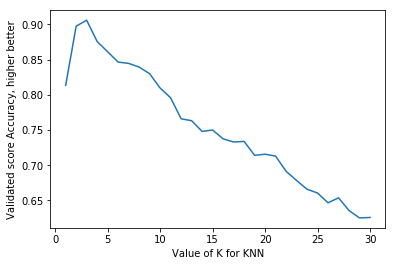

In [7]:
%matplotlib inline
plt.plot(k_range,k_scores_accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Validated score Accuracy, higher better')
plt.show()

Plot the RMSE error (Root Mean Square Error) for different K values, lower 
the error is better

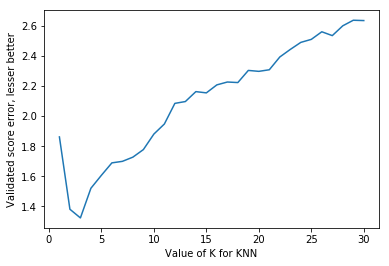

In [8]:
plt.plot(k_range,k_scores_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Validated score error, lesser better')
plt.show()

Find the number of neighbor that has higher accuracy and lesser error
TODO - As of now by looking at the graphs I could see that with number
of neighbors as 3 the accuracy is higher and the error is lesser

In [9]:
no_of_neighbors = 3
print ("Based on higher accuracy and lesser error the number of neighbors selected is: ", no_of_neighbors )

Based on higher accuracy and lesser error the number of neighbors selected is:  3


Use the number of neighbor that has higher accuracy and lesser error

In [10]:
knn = KNeighborsRegressor(n_neighbors=no_of_neighbors)
trained_model = knn.fit(X_train, y_train)

# Print the trained model scroe
score = trained_model.score(X_train, y_train)
print ("Trained model Score: ", score)

# Print the accuracy and error of the trained model
y_pred = knn.predict(X_test)
print ("Trained model Accuracy: ", metrics.r2_score(y_test,y_pred))
print ("Trained model Error: ",  np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Trained model Score:  0.9665457919339485
Trained model Accuracy:  0.905828124213108
Trained model Error:  1.3225606476327152
